# Imports

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.regularizers import L2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import math
import pandas as pd
RANDOM_STATE = 3

# Data Visualization

## Data Visualization: Descriptions

In [3]:
file_path = 'bank_loan_data.csv'

df = pd.read_csv(file_path)

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [34]:
# Experience of -3 and zipcode of 9307 make no sense, so let's remove those lines of data, and any other
# negative experience and zip code less than 10000.

df = df[df['Experience'] >= 0]
df = df[df['ZIP Code'] >= 10000]
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000
mean,2501.696584,45.556095,20.330099,73.825147,93168.521932,2.391146,1.936196,1.878714,56.645846,0.097029,0.104306,0.061047,0.596927,0.293916
std,1443.109812,11.321615,11.312922,46.111141,1761.253907,1.148333,1.747768,0.839679,101.835994,0.296026,0.305688,0.239441,0.490565,0.455600
min,1.000000,24.000000,0.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1255.500000,36.000000,10.500000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2498.000000,46.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3750.500000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.600000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Data Visualization: Histograms and Count Plots

I will graph the data with countplots. The categorical will be by category and the non-categorical will be split up into ranges.

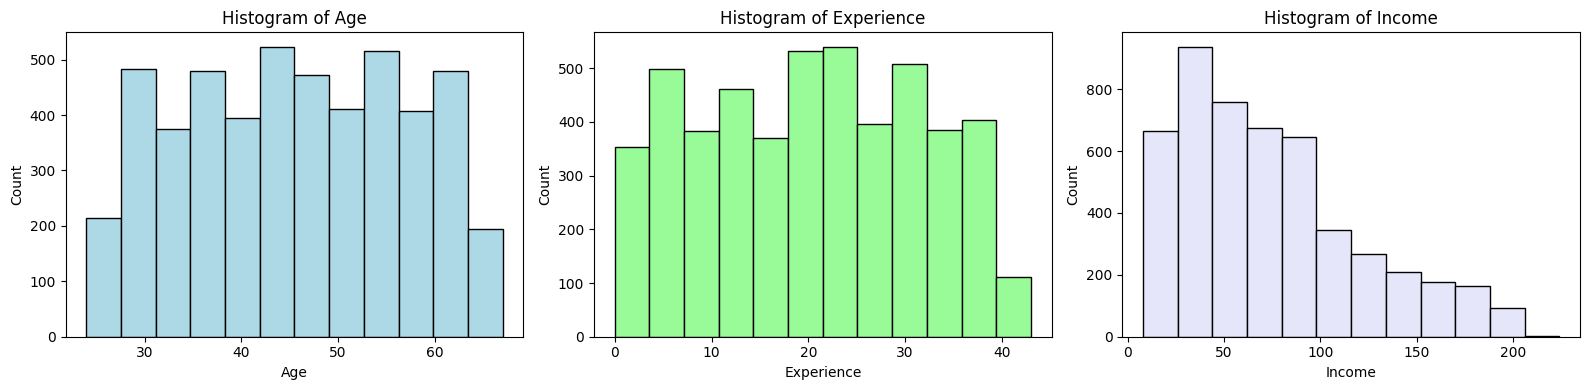

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

axes[0].hist(df['Age'], bins=12, edgecolor='black', color = 'lightblue')
axes[0].set_title("Histogram of Age")
axes[0].set_xlabel("Age")

axes[1].hist(df['Experience'], bins=12, edgecolor='black', color = 'palegreen')
axes[1].set_title("Histogram of Experience")
axes[1].set_xlabel("Experience")

axes[2].hist(df['Income'], bins=12, edgecolor='black', color = 'lavender')
axes[2].set_title("Histogram of Income")
axes[2].set_xlabel("Income")

for ax in axes:
    ax.set_ylabel("Count")

plt.tight_layout()
plt.savefig("histograms1.png", dpi=300)
plt.show()

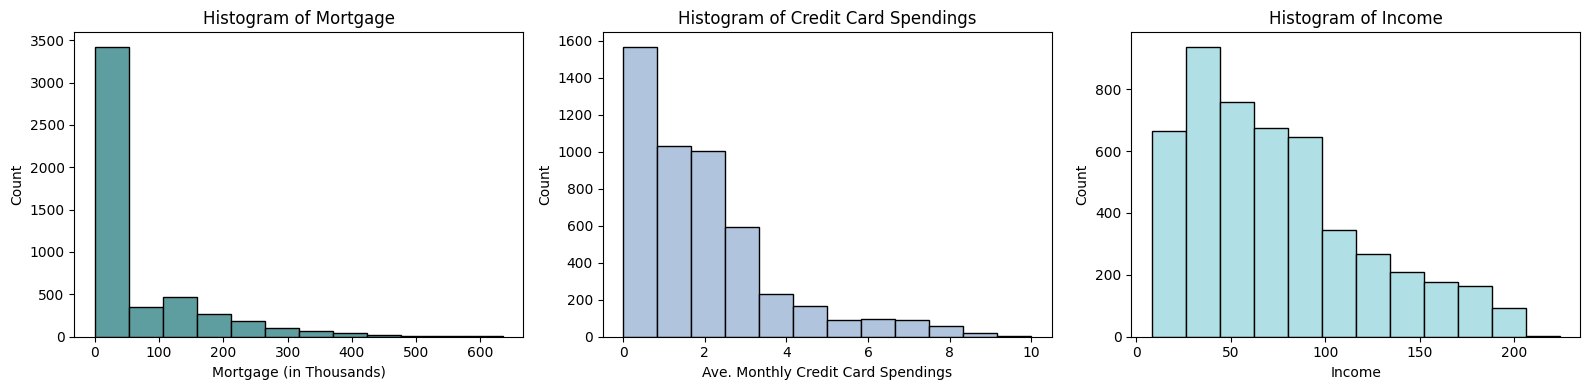

In [88]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

axes[0].hist(df['Mortgage'], bins=12, edgecolor='black', color = 'cadetblue')
axes[0].set_title("Histogram of Mortgage")
axes[0].set_xlabel("Mortgage (in Thousands)")

axes[1].hist(df['CCAvg'], bins=12, edgecolor='black', color = 'lightsteelblue')
axes[1].set_title("Histogram of Credit Card Spendings")
axes[1].set_xlabel("Ave. Monthly Credit Card Spendings")

axes[2].hist(df['Income'], bins=12, edgecolor='black', color = 'powderblue')
axes[2].set_title("Histogram of Income")
axes[2].set_xlabel("Income")

for ax in axes:
    ax.set_ylabel("Count")

plt.tight_layout()
plt.savefig("histograms2.png", dpi=300)
plt.show()

C:\Users\Spencer Steinmeyer\AppData\Local\Temp\ipykernel_13856\2429377882.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df["Education"], palette="Blues", ax = axes[0])
C:\Users\Spencer Steinmeyer\AppData\Local\Temp\ipykernel_13856\2429377882.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df["Family"], palette="Greens", ax = axes[1])
C:\Users\Spencer Steinmeyer\AppData\Local\Temp\ipykernel_13856\2429377882.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df["Securities Account"], palette="Reds", ax = axes[2])


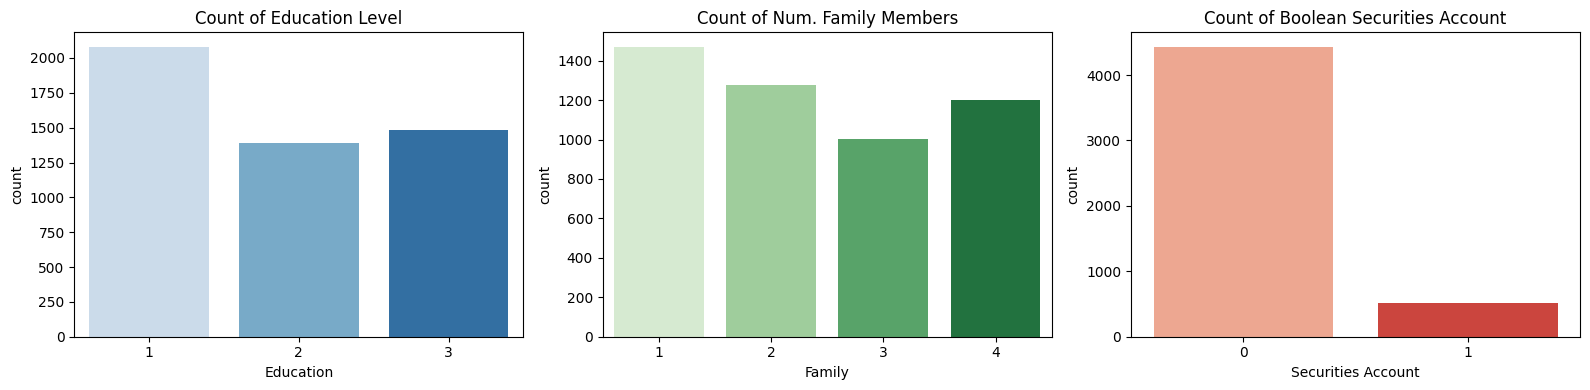

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
sns.countplot(x = df["Education"], palette="Blues", ax = axes[0])
axes[0].set_title("Count of Education Level")
sns.countplot(x = df["Family"], palette="Greens", ax = axes[1])
axes[1].set_title("Count of Num. Family Members")
sns.countplot(x = df["Securities Account"], palette="Reds", ax = axes[2])
axes[2].set_title("Count of Boolean Securities Account")

plt.tight_layout()
plt.savefig("count_plots1.png", dpi=300)
plt.show()

C:\Users\Spencer Steinmeyer\AppData\Local\Temp\ipykernel_13856\819790114.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df["CD Account"], palette="Purples", ax = axes[0])
C:\Users\Spencer Steinmeyer\AppData\Local\Temp\ipykernel_13856\819790114.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df["Online"], palette="Oranges", ax = axes[1])
C:\Users\Spencer Steinmeyer\AppData\Local\Temp\ipykernel_13856\819790114.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df["CreditCard"], palette="Greys", ax = axes[2])


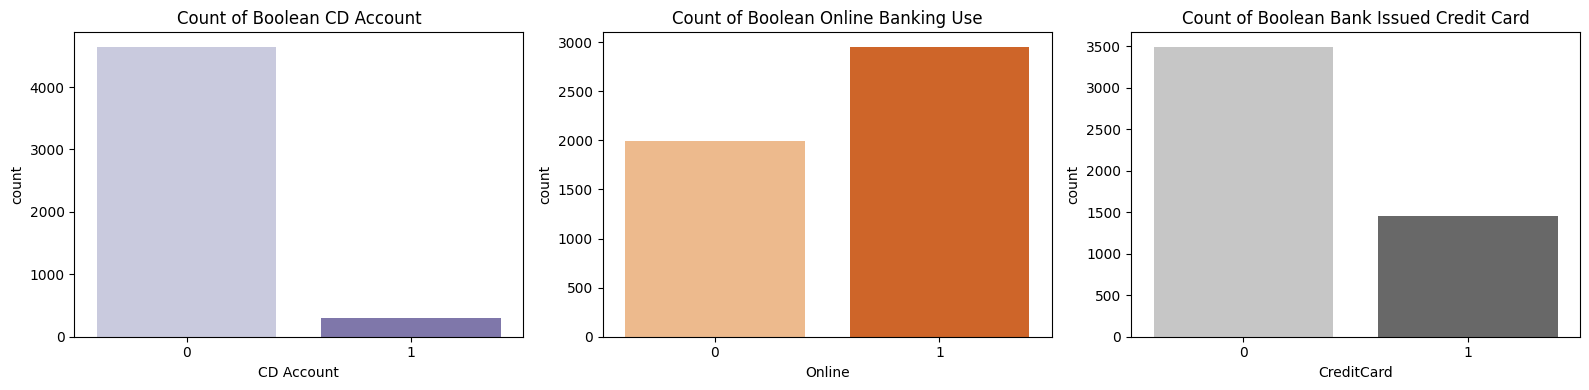

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
sns.countplot(x = df["CD Account"], palette="Purples", ax = axes[0])
axes[0].set_title("Count of Boolean CD Account")
sns.countplot(x = df["Online"], palette="Oranges", ax = axes[1])
axes[1].set_title("Count of Boolean Online Banking Use")
sns.countplot(x = df["CreditCard"], palette="Greys", ax = axes[2])
axes[2].set_title("Count of Boolean Bank Issued Credit Card")

plt.tight_layout()
plt.savefig("count_plots2.png", dpi=300)
plt.show()

C:\Users\Spencer Steinmeyer\AppData\Local\Temp\ipykernel_13856\3351704009.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = df["Personal Loan"], palette="Set3")


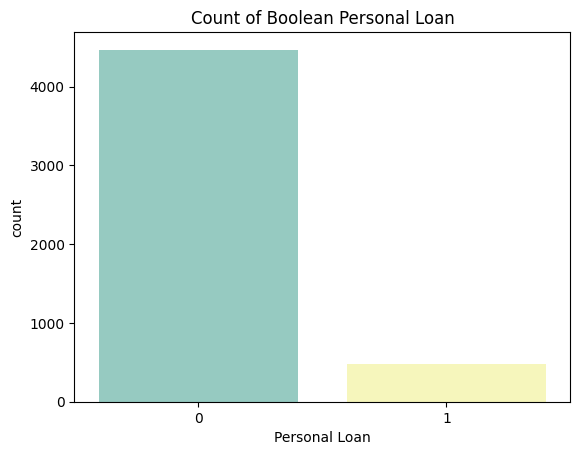

In [46]:
ax = sns.countplot(x = df["Personal Loan"], palette="Set3")
ax.set_title("Count of Boolean Personal Loan")

plt.savefig("target_count_plot.png", dpi = 300)
plt.show()

## Data Visualization: Correlation Plot

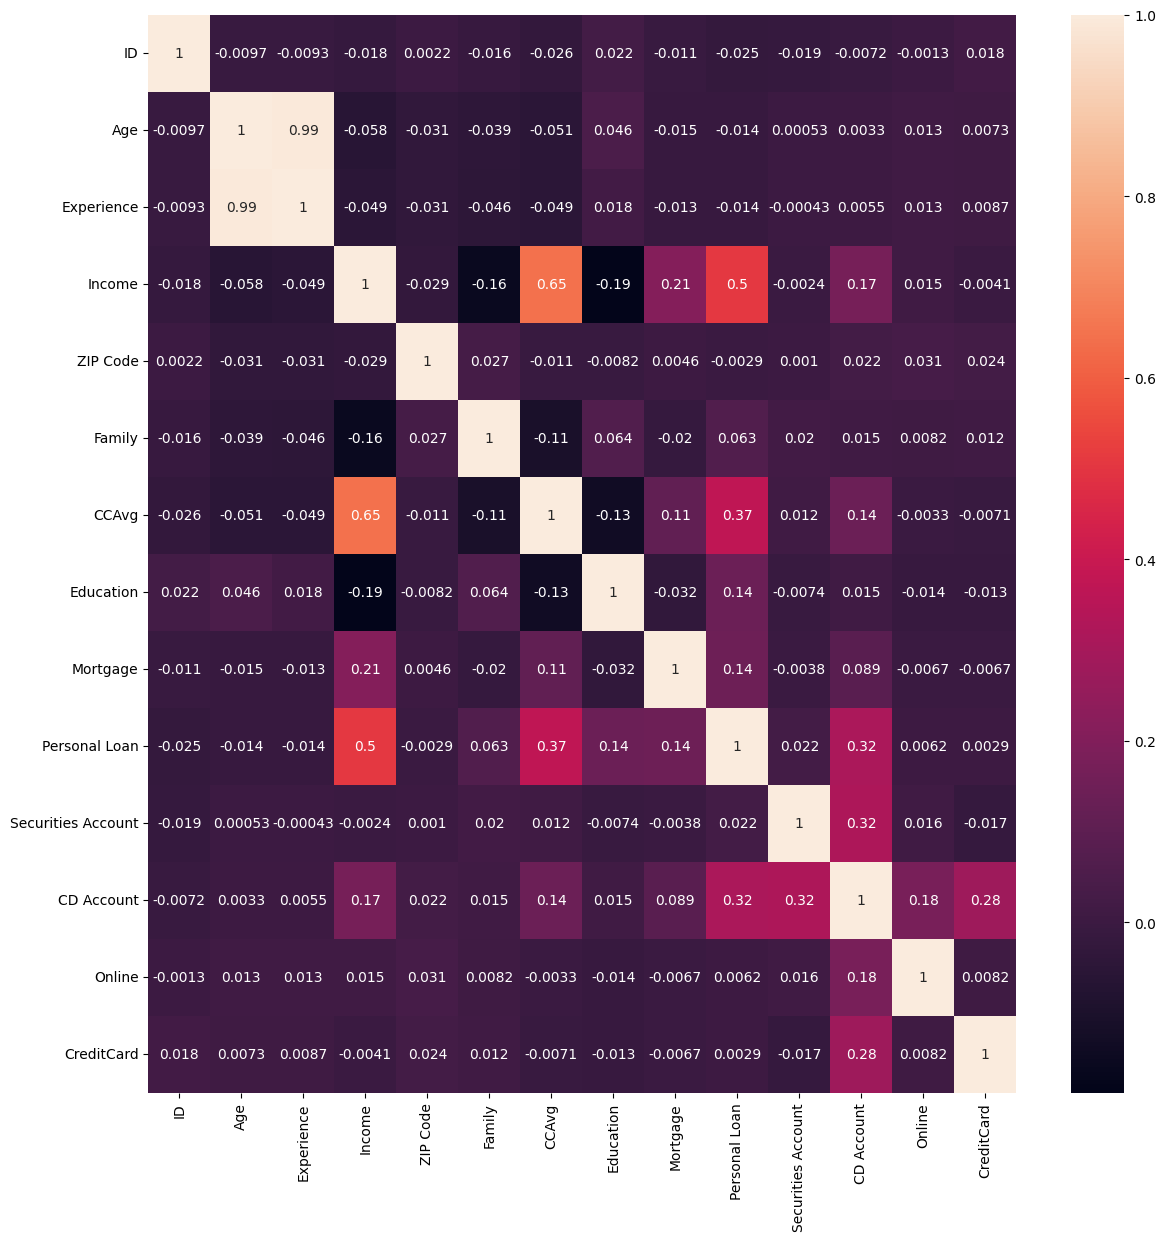

In [47]:
cm = df.corr()
plt.figure(figsize=(14,14))
sns.heatmap(cm, annot=True)
plt.savefig('correlation_map.png', facecolor='w', bbox_inches='tight')
plt.show()

## Data Visualization: Relational Graphs

Let's take a deeper dive into some of these interesting relationships by graphing them. We will look at income, CD account, and CCAvg, as they are the highest correlated with personal loan. We will make count plots, colored by personal loan.

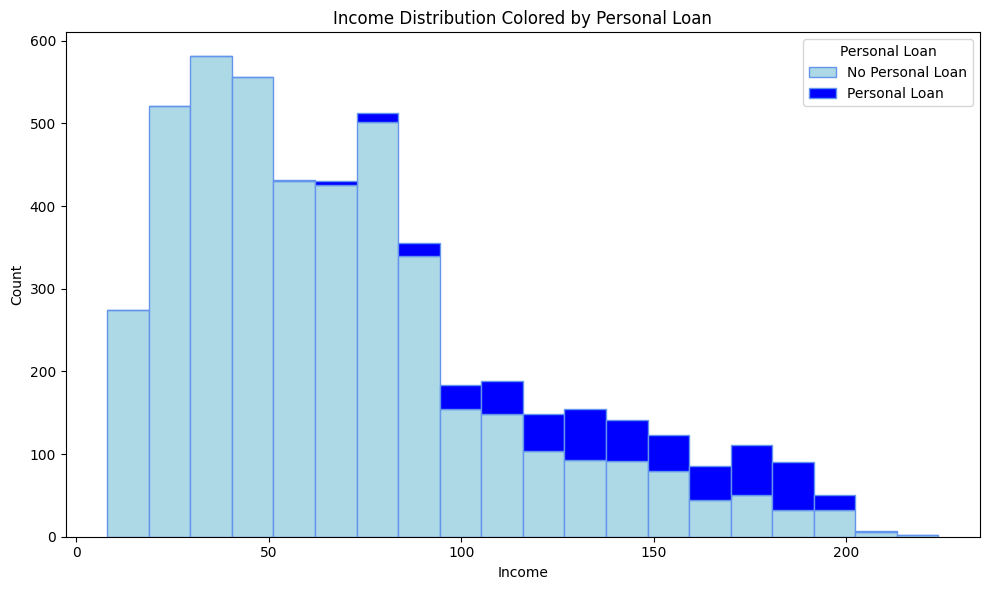

In [52]:
loan_yes = df[df["Personal Loan"] == 1]["Income"]
loan_no = df[df["Personal Loan"] == 0]["Income"]

plt.figure(figsize=(10, 6))
plt.hist([loan_no, loan_yes], bins=20, edgecolor = 'cornflowerblue', stacked=True, color=["lightblue", "blue"], label=["No Personal Loan", "Personal Loan"])

plt.title("Income Distribution Colored by Personal Loan")
plt.xlabel("Income")
plt.ylabel("Count")
plt.legend(title="Personal Loan")

plt.tight_layout()
plt.show()


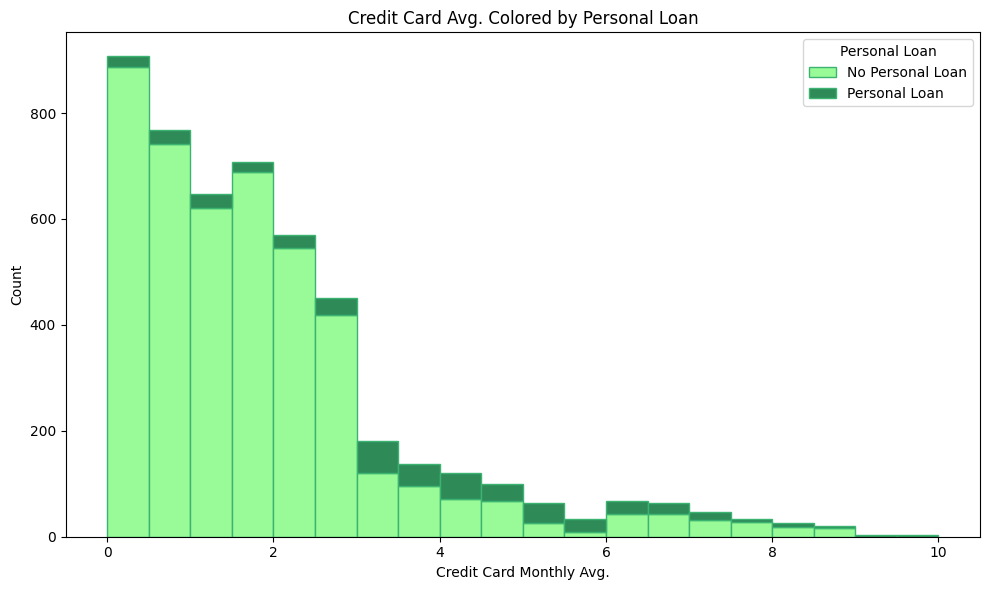

In [54]:
loan_yes = df[df["Personal Loan"] == 1]["CCAvg"]
loan_no = df[df["Personal Loan"] == 0]["CCAvg"]

plt.figure(figsize=(10, 6))
plt.hist([loan_no, loan_yes], bins=20, edgecolor = 'mediumseagreen', stacked=True, color=["palegreen", "seagreen"], label=["No Personal Loan", "Personal Loan"])

plt.title("Credit Card Avg. Colored by Personal Loan")
plt.xlabel("Credit Card Monthly Avg.")
plt.ylabel("Count")
plt.legend(title="Personal Loan")

plt.tight_layout()
plt.show()


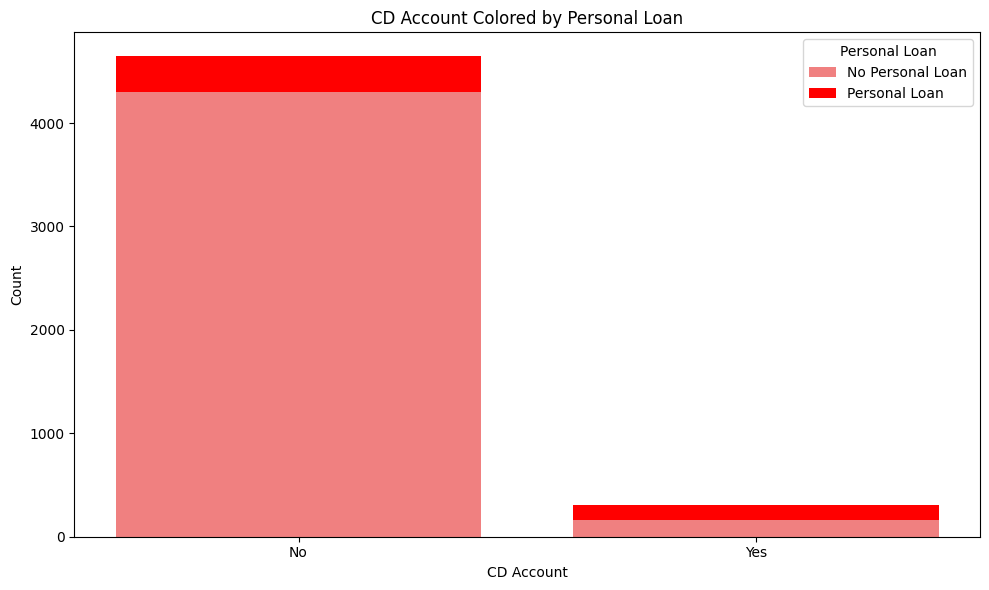

In [58]:
stacked_data = df.groupby(["CD Account", "Personal Loan"]).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
plt.bar(stacked_data.index, stacked_data[0], label="No Personal Loan", color="lightcoral")
plt.bar(stacked_data.index, stacked_data[1], bottom=stacked_data[0], label="Personal Loan", color="red")

plt.xticks(ticks=[0, 1], labels=["No", "Yes"])

plt.title("CD Account Colored by Personal Loan")
plt.xlabel("CD Account")
plt.ylabel("Count")
plt.legend(title="Personal Loan")

plt.tight_layout()
plt.show()


# Neural Network

## Scale Data

In [62]:
X = df.drop(columns = ['Personal Loan'])
y = df['Personal Loan']

scaler = StandardScaler()
X = scaler.fit_transform(X)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (4947, 13)
y shape: (4947,)


## Splitting Data

In [66]:
xtrain, xtemp, ytrain, ytemp = train_test_split(X, y, train_size=0.6, random_state=RANDOM_STATE)

xval, xtest, yval, ytest = train_test_split(xtemp, ytemp, train_size=0.5, random_state=RANDOM_STATE)

print(f"Train samples: {len(xtrain)}")
print(f"Validation samples: {len(xval)}")
print(f"Test samples: {len(xtest)}")

print(f"Proportion of positive examples in training: {sum(ytrain) / len(ytrain):.4f}")
print(f"Proportion of positive examples in validation: {sum(yval) / len(yval):.4f}")
print(f"Proportion of positive examples in testing: {sum(ytest) / len(ytest):.4f}")

Train samples: 2968
Validation samples: 989
Test samples: 990
Proportion of positive examples in training: 0.0977
Proportion of positive examples in validation: 0.0900
Proportion of positive examples in testing: 0.1020


## Testing Neural Networks

In [67]:
array21 = [30,40,20]
array22 = [20,12,4]

array31 = [40,50,30,10]
array32 = [30,35,24,18]
array33 = [50,35,23,12]

In [68]:
def makeModel(numLayers, layerUnitArray, lam):
    model = Sequential()
    model.add(Input(shape=(13,)))
    for i in range(numLayers):
        model.add(Dense(layerUnitArray[i], activation = "relu", kernel_regularizer = L2(lam)))
    model.add(Dense(1, activation = "sigmoid", kernel_regularizer = L2(lam)))

    return model


In [69]:
models = np.empty(10, dtype=object)
models[0] = makeModel(3, array21, .01)
models[1] = makeModel(3, array21, .001)
models[2] = makeModel(3, array22, .01)
models[3] = makeModel(3, array22, .001)
models[4] = makeModel(4, array31, .01)
models[5] = makeModel(4, array31, .001)
models[6] = makeModel(4, array32, .01)
models[7] = makeModel(4, array32, .001)
models[8] = makeModel(4, array33, .01)
models[9] = makeModel(4, array33, .001)

results = []

for i in range(len(models)):
    models[i].compile(
        loss = tf.keras.losses.BinaryCrossentropy(),
        optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4),
    )
    
    models[i].fit(
        xtrain,ytrain,            
        epochs=40,
        verbose = 0
    )
    
    cv_loss = models[i].evaluate(xval, yval, verbose=0)
    results.append(cv_loss)
    
    print(f"Model {i + 1} - Validation Loss: {cv_loss}")

print(results)

In [74]:
results = [0.1998039036989212, 0.14268828928470612, 0.23254410922527313, 0.129497691988945, 0.2257291078567505, 0.15006403625011444, 0.22991691529750824, 0.1567789763212204, 0.2372884899377823, 0.1516662836074829]

for i in range(len(results)):
    print(f"Model {i + 1} CV loss: {results[i]}")
    

Model 1 CV loss: 0.1998039036989212
Model 2 CV loss: 0.14268828928470612
Model 3 CV loss: 0.23254410922527313
Model 4 CV loss: 0.129497691988945
Model 5 CV loss: 0.2257291078567505
Model 6 CV loss: 0.15006403625011444
Model 7 CV loss: 0.22991691529750824
Model 8 CV loss: 0.1567789763212204
Model 9 CV loss: 0.2372884899377823
Model 10 CV loss: 0.1516662836074829


## Make Chosen Model

The model with 20,12,4, layer sizes, and lambda of .001 gave the lowest CV loss. So that is the model we will use.

In [75]:
inpSize = xtrain.shape[1]
model = Sequential(
    [
        tf.keras.Input(shape=(inpSize,)),
        Dense(20, activation = 'relu',   name = "L1", kernel_regularizer = L2(.001)),
        Dense(12, activation = 'relu',   name = "L2", kernel_regularizer = L2(.001)),
        Dense(4, activation = 'relu',   name = "L3", kernel_regularizer = L2(.001)),
        Dense(1, activation = 'sigmoid',   name = "OL", kernel_regularizer = L2(.001)),
    ]
)
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ (None, 20)                  │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L2 (Dense)                           │ (None, 12)                  │             252 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L3 (Dense)                           │ (None, 4)                   │              52 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OL (Dense)                           │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 589 (2.30 KB)

 Trainable params: 589 (2.30 KB)

 Non-trainable params: 0 (0.00 B)

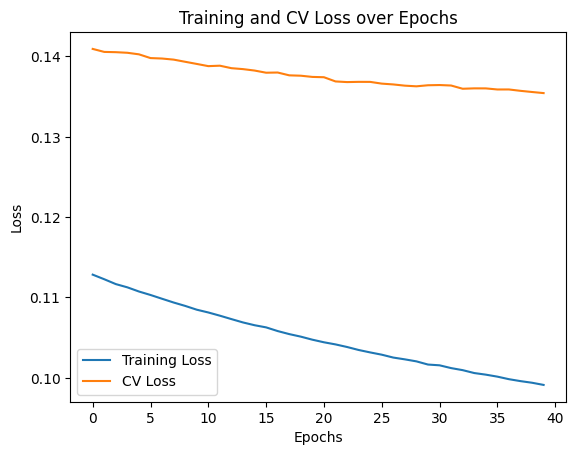

In [85]:
model.compile(
        loss = tf.keras.losses.BinaryCrossentropy(),
        optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4),
        metrics = ['accuracy']
)

history = model.fit(
    xtrain, ytrain,
    validation_data =(xval, yval),  
    epochs=40,
    verbose=0
)


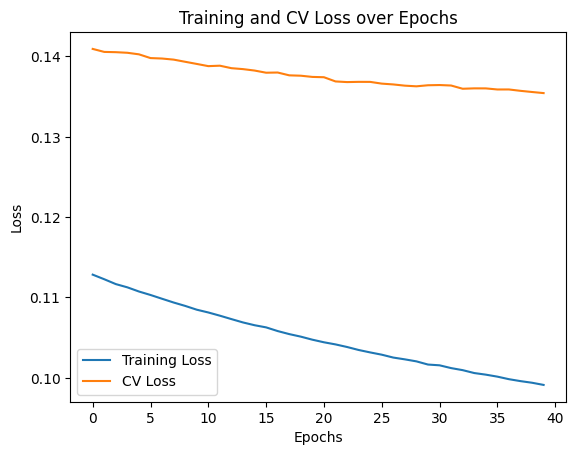

In [86]:

plt.clf()
plt.plot(history.history['loss'], label='Training Loss')

plt.plot(history.history['val_loss'], label='CV Loss')

plt.title('Training and CV Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.savefig("trainCVloss.png", dpi = 300)
plt.show()

In [77]:
model.compile(
        loss = tf.keras.losses.BinaryCrossentropy(),
        optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4),
        metrics = ['accuracy']
)

history = model.fit(
    xtrain, ytrain,
    validation_data =(xtest, ytest),  
    epochs=40,
    verbose=0
)

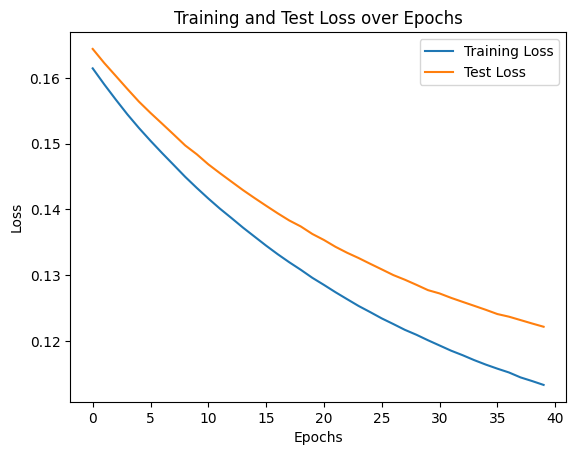

In [79]:
plt.clf()
plt.plot(history.history['loss'], label='Training Loss')

plt.plot(history.history['val_loss'], label='Test Loss')

plt.title('Training and Test Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [82]:
ytestProb = model.predict(xtest)
ytestPred = (ytestProb > 0.5).astype(int)

cm = confusion_matrix(ytest, ytestPred)

print(cm)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step
[[879  10]
 [ 18  83]]


## Precision, F1, Recall

In [84]:
tn, fp, fn, tp = cm.ravel()

precision = tp / (tp+fp)
recall = tp/(tp+fn)
F1 = 2 * precision * recall / (precision + recall)

print(f"Precision: {precision} \nRecall: {recall} \nF1 Score: {F1}")

Precision: 0.8924731182795699 
Recall: 0.8217821782178217 
F1 Score: 0.8556701030927835
